# Machine learning and Predictive Analyatics 

First few rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0   40   M           ATA        140          289          0    172   
1   49   F           NAP        160          180          0    156   
2   37   M           ATA        130          283          0     98   
3   48   F           ASY        138          214          0    108   
4   54   M           NAP        150          195          0    122   

  ExerciseAngina  HeartDisease  
0              N             0  
1              N             1  
2              N             0  
3              Y             1  
4              N             0  
Accuracy of Logistic Regression Model: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        77
           1       0.83      0.79      0.81       107

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted a

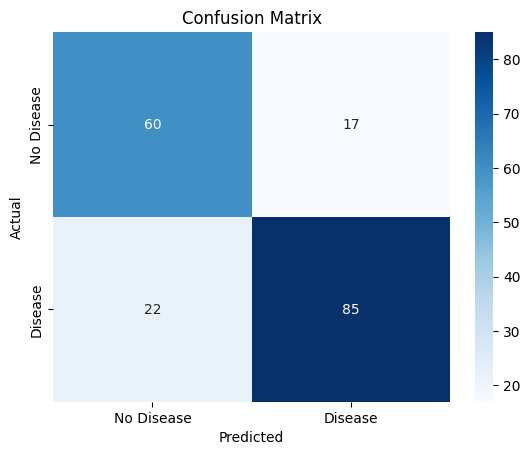


Feature Importance (Coefficients):
             Feature  Coefficient
9   ExerciseAngina_Y     0.867034
3          FastingBS     0.402005
5              Sex_M     0.401793
0                Age     0.266816
1          RestingBP     0.036115
8   ChestPainType_TA    -0.135325
4              MaxHR    -0.305906
2        Cholesterol    -0.382197
7  ChestPainType_NAP    -0.534651
6  ChestPainType_ATA    -0.748900


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'heart_failure_data.csv' with your actual file path
df = pd.read_csv(r'C:\Capstone Project\Module 1\Data-Analytics-Capstone\Data\Clean Data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 1: Preprocessing
# Separate features (X) and target (y)
X = df.drop("HeartDisease", axis=1)  # Drop the target column
y = df["HeartDisease"]  # Target column

# Handle categorical variables (convert to numerical format)
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Coefficients of the Logistic Regression Model
coefficients = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": model.coef_[0]}
).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)


First few rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0   40   M           ATA        140          289          0    172   
1   49   F           NAP        160          180          0    156   
2   37   M           ATA        130          283          0     98   
3   48   F           ASY        138          214          0    108   
4   54   M           NAP        150          195          0    122   

  ExerciseAngina  HeartDisease  
0              N             0  
1              N             1  
2              N             0  
3              Y             1  
4              N             0  

Columns after one-hot encoding:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y']

Performing Grid Search for optimal KNN parameters...
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Cross-Validation Accuracy:

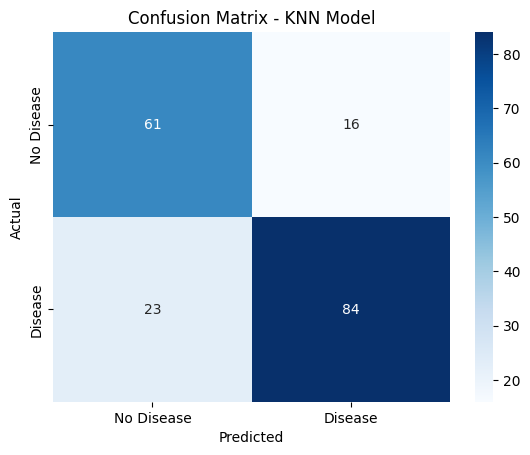

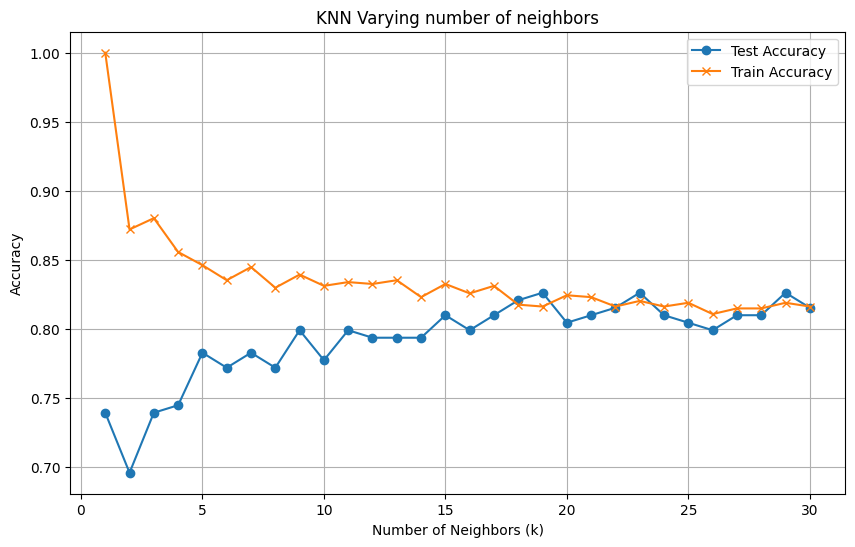

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace the file path with your actual file path
df = pd.read_csv(r'C:\Capstone Project\Module 1\Data-Analytics-Capstone\Data\Clean Data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 2: Preprocessing
# Separate features (X) and target (y)
X = df.drop("HeartDisease", axis=1)  # Drop the target column
y = df["HeartDisease"]  # Target column

# Handle categorical variables (convert to numerical format)
X = pd.get_dummies(X, drop_first=True)

# Display the columns after encoding
print("\nColumns after one-hot encoding:")
print(X.columns.tolist())

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: K-Nearest Neighbors (KNN) Model
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Optional: Hyperparameter tuning using GridSearchCV
# Define the parameter grid for 'n_neighbors'
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Testing k from 1 to 30
    'weights': ['uniform', 'distance'],  # Uniform vs distance weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to find the best parameters
print("\nPerforming Grid Search for optimal KNN parameters...")
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Initialize the KNN classifier with best parameters
knn_best = KNeighborsClassifier(**best_params)

# Train the KNN model
knn_best.fit(X_train, y_train)

# Step 5: Predictions
y_pred = knn_best.predict(X_test)

# Step 6: Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN Model: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Visualizing KNN Performance
# Plotting the number of neighbors vs. cross-validation accuracy
neighbors = list(range(1, 31))
train_accuracy = []
test_accuracy = []

for k in neighbors:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    train_accuracy.append(knn_temp.score(X_train, y_train))
    test_accuracy.append(knn_temp.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors, test_accuracy, label='Test Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Train Accuracy', marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Feature Importance (Optional for KNN)
# Note: KNN doesn't provide feature coefficients like Logistic Regression.
# However, you can analyze feature importance using other methods like permutation importance or feature selection techniques.